## Изучение данных из файла

In [105]:
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt # импорт библиотеки
import pandas as pd # импорт библиотеки pandas
import seaborn as sns


df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')# прочитаем файл 'real_estate_data.csv' 
#и сохраним его в переменной df
df.info() #просмотр сводной информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

***Описание данных***
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

In [106]:
df.head() #вывод первых строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В каждой строке таблицы - данные по каждому объявлению о продаже. Количество значений в столбцах различается, значит, в данных есть пропущенные значения.  Также необходимо изменить тип значений некоторых столбцов.


## Предобработка данных

### Обработка пропусков

In [107]:
print('Количество строк с пропусками:')
df.isna().sum()#подсчет пропущенных значений

Количество строк с пропусками:


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [108]:
print('Процент строк с пропусками:')
round(df.isna().sum() / len(df) * 100, 1) #подсчет пропущенных значений

Процент строк с пропусками:


total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.8
floors_total             0.4
living_area              8.0
floor                    0.0
is_apartment            88.3
studio                   0.0
open_plan                0.0
kitchen_area             9.6
balcony                 48.6
locality_name            0.2
airports_nearest        23.4
cityCenters_nearest     23.3
parks_around3000        23.3
parks_nearest           65.9
ponds_around3000        23.3
ponds_nearest           61.6
days_exposition         13.4
dtype: float64

Сначала обратим внимание на пропуски в данных, заполняемых пользователем. Можно предположить, что если в колонке `balcony` значение пропущено, значит балкона нет и пропуск можно заменить на ноль. Строки с пропущенными значениями в колонке `locality_name` можно удалить ввиду незначительного количества таких строк. Колонку `is_apartment`, вероятно, заполняют только те пользователи, чье помещение является апартаментами, значит пропущенные значения в этом столбце можно заменить на `False`.

In [109]:
df.loc[df['balcony'].isna(), 'balcony']  = 0 #замена пропусков в данных о алконе на 0
df.dropna(subset=['locality_name'], inplace=True) #удаление строк с пропусками в данных о населенном пункте
df.loc[df['is_apartment'].isna(), 'is_apartment']  = False #замена пропусков в данных в столбце 'is_apartment' на False


Проверим есть ли связь между пропусками в столбце `kitchen_area` и помещением вида "квартира-студия"

In [110]:
df.loc[(df['kitchen_area'].isna()) & (df['studio'] == True)].count() 
#подсчет строк, где пропущено значение в данных о площади кухни
#в помещении вида "квартира-студия"

total_images            149
last_price              149
total_area              149
first_day_exposition    149
rooms                   149
ceiling_height           77
floors_total            146
living_area             139
floor                   149
is_apartment            149
studio                  149
open_plan               149
kitchen_area              0
balcony                 149
locality_name           149
airports_nearest         92
cityCenters_nearest      92
parks_around3000         92
parks_nearest            21
ponds_around3000         92
ponds_nearest            51
days_exposition         135
dtype: int64

По незначительноу количеству совпадений можно сделать вывод, что связи нет. Проверим в каких населенных пунктах отсутствует информация об удаленности от центра города и от аэропорта

In [111]:
print('Пропущены значения в столбце "cityCenters_nearest":')
print(df.loc[df['cityCenters_nearest'].isna()]['locality_name'].value_counts()) #вывод уникальных значений столбца 'locality_name' 
#и числа пропусков в столбце 'cityCenters_nearest' 
print()
print('Пропущены значения в столбце "airports_nearest":')
df.loc[df['airports_nearest'].isna()]['locality_name'].value_counts()#вывод уникальных значений столбца 'locality_name' 
#и числа пропусков в столбце 'airports_nearest' 


Пропущены значения в столбце "cityCenters_nearest":
посёлок Мурино        522
Всеволожск            398
Гатчина               307
деревня Кудрово       299
Выборг                237
                     ... 
поселок Гончарово       1
поселок Тёсово-4        1
поселок Кирпичное       1
деревня Шпаньково       1
деревня Снегирёвка      1
Name: locality_name, Length: 345, dtype: int64

Пропущены значения в столбце "airports_nearest":


посёлок Мурино        522
Всеволожск            398
Гатчина               307
деревня Кудрово       299
Выборг                237
                     ... 
поселок Гончарово       1
поселок Тёсово-4        1
поселок Кирпичное       1
деревня Шпаньково       1
деревня Снегирёвка      1
Name: locality_name, Length: 344, dtype: int64

Данные пропущены в основном в населенных пунктах области. Так как информация о расстоянии до центра города имеет значение для Санкт-Петербурга, заменим пропуски медианой с группировкой по населенному пункту. Так же поступим с пропусками в столбце `airports_nearest`, т.к. аэропорт в Ленинградской области один и находится примерно в географическом центре области.Напишем функцию, которая заменит пропуски медианными значениями. Чтобы заполнить пропуски с группировкой используем метод `loc`:

In [112]:
def values_by_group(data, column, group):#функция для заполнения пропущенных значений медианой с группировкой по одной переменной
    for elem in data[group].unique(): #цикл перебирает уникальные значения заданного столбца
        median = data.loc[data[group] == elem, column].median() #находит медиану для каждого значения в заданной колонке
        data.loc[(data[column].isna()) & (data[group] == elem), column] = median #заполняет пропуски медианой
    


Целесобразно также заменить пропуски в столбцах `floors_total`, `kitchen_area`, `living_area`, `ceiling_height` с группировкой по населенному пункту, предполагая, что для города характерна определенная застройка.

In [113]:
columns = ['cityCenters_nearest', 'airports_nearest', 'floors_total', 'kitchen_area', 'living_area', 'ceiling_height']
for column in columns: #цикл поочередно заполняет пропуски в выбранных столбцах с помощью функции values_by_group
    values_by_group(df, column, 'locality_name')

In [114]:
df.isna().sum() #проверка результата обработки пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            121
floors_total                0
living_area                17
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area               19
balcony                     0
locality_name               0
airports_nearest         5386
cityCenters_nearest      5386
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

После применения функции были заполнены все пропуски только в столбце `floors_total`, значит не по всем населенным пунктам есть информация в остальных столбцах. Заменим пропуски медианой по всей таблице в столбцах `living_area`, `kitchen_area`, `ceiling_height`. Пропуски в данных о близлежащих парках и прудах, полученных автоматически, оставим без изменений, т.к. их восстановление не представляется возможным.

In [115]:
columns = ['cityCenters_nearest', 'airports_nearest', 'living_area', 'kitchen_area', 'ceiling_height']
for column in columns: #цикл поочередно заполняет пропуски в выбранных столбцах медианой по всему столбцу
    df[column] = df[column].fillna(df[column].median())


Предположим, что пропуски в данных о длительности размещения объявления означают, что объявление еще не закрыто. Будем считать датой выгрузки самую последнюю дату в таблице. Рассчитаем количество дней размещения публикации, вычислив разницу между этой датой и датой публикации и заполним пропуски.

In [116]:
#замена типа данных в столбце 'first_day_exposition' на 'datetime64'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
last_date = df['first_day_exposition'].max() #сохраним в переменную last_date самую ближайшую дату публикации объявления
#заполним пропуски в столбце 'days_exposition' разницей между ближайшей датой публикации объявления 
#и датой публикации объявления с пропущенным значением
df.loc[df['days_exposition'].isna(), 'days_exposition'] = (last_date - df['first_day_exposition']).dt.days 

In [117]:
df.isna().sum() #проверка результата обработки пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition             0
dtype: int64

#### Вывод

Пропуски в данных могли быть допущены пользователем при заполнении информации о недвижимости, либо по техническим причинам, когда некоторые данные определялись атоматически. Строки с незначительным количеством пропусков были удалены, а данные, необходимые для анализа, были заполнены.

### Изменение типа данных

Рассмотрим названия населенных пунктов

In [118]:
df['locality_name'].unique() #вывод уникальных значений столбца 'locality_name'

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Заменим в названиях букву "ё" на "е"

In [119]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') #замена буквы в значении

Найдем населенные пункты, у которых полностью совпадает название, но не везде указан тип населенного пункта

In [120]:
village = [] #список для нас.пунктов, где указан тип
 
city = [] #список для нас.пунктов, где не указан тип
for i in df['locality_name']: #цикл перебирает значения столбца 'locality_name'
    if ('поселок' in i) or ('село' in i) or ('деревня' in i) or ('товарищество' in i): 
        village.append(i) #добавляет в список значение, если в нем есть контрольное слово
    else: city.append(i) #добавляет в список значения в остальных случаях
        
def only_unique(arr): #функция для выделения уникальных значений в заданном списке
    return list(set(arr))

city_uniq  = only_unique(city) #переменная со списком уник.значений нас.пунктов без указания типа
village_uniq = only_unique(village) #переменная со списком уник.значений нас.пунктов с указанным типом
list_names = [] #список для совпадений
for city in city_uniq: #цикл перебирает значения в списке
    if city in ' '.join(village_uniq): #если находит значение в другом списке
        list_names.append(city) #добавляет значение в список совпадений
        
list_names #список совпадений в наименовании нас.пунктов где тип указан и где тип не указан

['Коммунар',
 'Луга',
 'Кингисепп',
 'Любань',
 'Кудрово',
 'Никольское',
 'Мурино',
 'Высоцк']

Выясним тип населенного пункта найденных совпадений

In [121]:
for i in village_uniq: #цикл перебирает значения списка с нас.пунктами с указ.типом
    for name in list_names: #цикл перебирает значения в списке  совпадений
        if name in i: #и если значение в списе с нас.пунктами с указ.типом
            print(i) #печатает название нас.пункта с указанным типом

поселок Кингисеппский
село Русско-Высоцкое
деревня Кудрово
поселок Мурино
поселок Усть-Луга
поселок Коммунары
село Никольское
поселок Любань


Некоторые значения совпадают только по части наименования, а значит, заменим значения столбца на наименование с указанием типа только по значениям с полным совпадением.

In [122]:
#функция возвращает значение с указ.типа населенного пункта, 
#если значение удовлетворяет условиям, либо возвращает прежнее значение
def city_to_village(value): 
    for i in village_uniq:
        if (value in ['Кудрово', 'Мурино', 'Никольское', 'Любань']) and (value in i):
            return i
    return value

Заменим значения столбца `locality_name`с помощью функции `city_to_village`

In [123]:
df['locality_name'] = df['locality_name'].apply(city_to_village)

Приведем данные в некоторых столбцах к целочисленному виду, т.к. для вывода по этим столбцам не важна информация до копеек и сантиметров, а в случае сравнения данных, вещественный тип данных может исказить результат

In [124]:
columns = ['cityCenters_nearest', 'airports_nearest', 'floors_total', 'balcony', 'days_exposition', 'last_price']
for column in columns: #цикл заменяет тип данных в выбранных столбцах с помощью метода astype()
    df[column] = df[column].astype('int')

In [125]:
df.info() #вывод общей информации после замены

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

In [126]:
df.duplicated().sum() #проверка дубликатов

0

#### Вывод

В столбце с названием населенного пункта были обнаружены повторяющиеся значения с разницей в одну букву. Данные были приведены к единому формату. Также, вещественный тип данных был приведен к целочисленному в столбцах, где это было необходимо.

## Расчёты и добавление результатов в таблицу

Рассчитаем и добавим столбец в таблицу с данными о цене за квадратный метр

In [127]:
df['price_per_m2'] = (df['last_price'] / df['total_area']).astype('int') 
#добавление столбца и приведение значений к целочисленному виду

Добавим столбец в таблицу с данными дня недели, месяца и года подачи объявления

In [128]:
#добавление столбца "день недели" пуликации объявления
df['day_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday 

#добавление столбца "месяц" пуликации объявления
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month

#добавление столбца "год" пуликации объявления
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year


Добавим столбец в таблицу с группировкой в зависимости от этажа с помощью функции

In [129]:
# функция перебирает значения столбца 'floor' и , в зависимости от расположания этажа в доме, 
#возвращает название группы 'первый', 'последний' или 'другой'
def floor_grouped(row_values): 
    if row_values['floor'] == 1:
        return 'первый'
    if row_values['floor'] == row_values['floors_total']:
        return 'последний'
    return 'другой'
    
df['floor_group'] = df.apply(floor_grouped, axis=1) 


Добавим столбцы с отношением общей площади к жилой и площади кухни к общей

In [130]:
df['living_to_total'] = round(df['living_area'] / df['total_area'], 2) #добавление столбца с отношением общей площади к жилой
#округление значений нового столбца до сотых
df['kitchen_to_total'] = round(df['kitchen_area'] / df['total_area'], 2) #добавление столбца с отношением площади кухни к общей
#округление значений нового столбца до сотых

df.head() #вывод первых строк обновленной таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_exposition,month_exposition,year_exposition,floor_group,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,57,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,2.0,574.0,558,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,3.0,234.0,424,408176,4,7,2015,другой,0.20,0.06
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.32,0.41


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

## Исследовательский анализ данных

### Анализ данных

Изучим данные о площади, цене, числе комнат, высоте потолков и времени продажи квартиры.

#### Площадь

В данных о площади много выбросов, что затрудняет анализ графика

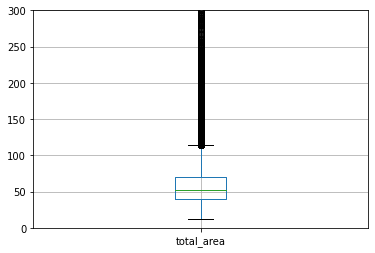

In [132]:
plt.ylim(0, 300)
df.boxplot('total_area') 
plt.show()
#диаграмма размаха по столбцу 'total_area'


Медиана на отметке 50 кв.м. Есть квартиры с площадью больше 120 кв.м., но такие объявления встречаются редко

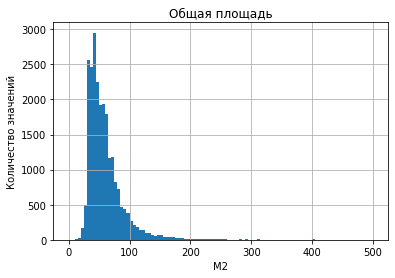

In [133]:
df['total_area'].hist(range=(0, 500),bins=100) #гистограмма по столбцу 'total_area'
plt.xlabel('М2')
plt.ylabel('Количество значений')
plt.title('Общая площадь')
plt.show()

График показывает распределение Пуассона и показывает редкие выбросы около нуля, после наиболее типичные значения площади помещения и далее убывает со снижением количества объявлений в зависимости от увеличения площади. Максимальное значение стобца 'total_area' значительно ревышает большинство других значений, а после отметки 200 - близко к нулю. Также встречаются единичные случаи, когда площадь равна нулю или превышает 400 кв.м. 

#### Цена

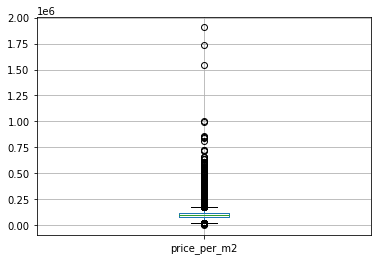

In [134]:
df.boxplot('price_per_m2') #диаграмма размаха по столбцу 'price_per_m2'
plt.show()

Видно, что есть выбросы. Большинство до 700 тыс. и единичные на отметке в почти 2 млн. руб за кв.м. Рассмотрим диаграмму подробнее, уменьшив масштаб

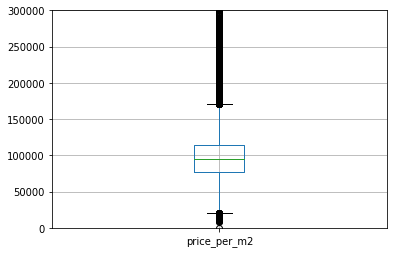

In [135]:
plt.ylim(0, 300000)
df.boxplot('price_per_m2') 
plt.show()
#диаграмма размаха по столбцу 'price_per_m2'  с измененным масштабом

По диаграмме видно, что основная масса объявленний со стоимостью до 120 тыс.руб. за квадратный метр. Есть много объявлений со стоимостью менее 25 тыс. и более 170 тыс. за кв.м., но их можно считать выбросами и не учитывать при анализе

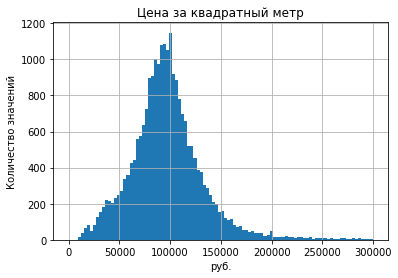

In [136]:
df['price_per_m2'].hist(range=(0, 300000), bins=100) #гистограмма по столбцу 'price_per_m2'
plt.xlabel('руб.')
plt.ylabel('Количество значений')
plt.title('Цена за квадратный метр')
plt.show()

Гистограмма показывает нормальное распределение, когда пик приходится на среднее значение в столбце

#### Число комнат

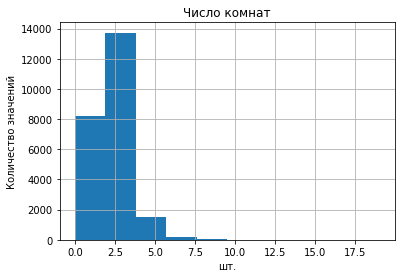

In [137]:
df.hist('rooms')  #гистограмма по столбцу 'rooms'
plt.xlabel('шт.')
plt.ylabel('Количество значений')
plt.title('Число комнат')
plt.show()

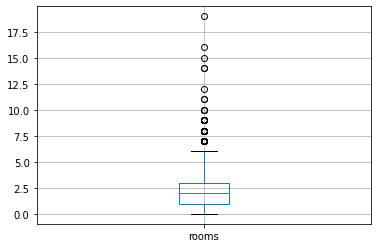

In [138]:
df.boxplot('rooms') #диаграмма размаха столбца 'rooms'
plt.show()

In [139]:
df['rooms'].describe() #описание столца 'rooms'

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Наибольшее количество объявлений о продаже квартир с 1-3 комнатами, также есть выбросы со значениями до 19 и 0.

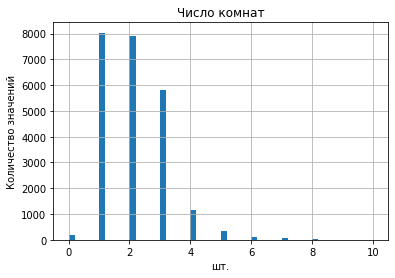

In [140]:
df['rooms'].hist(range=(0, 10), bins=50) #гистограмма по столбцу 'rooms'
plt.xlabel('шт.')
plt.ylabel('Количество значений')
plt.title('Число комнат')
plt.show()

Рассмотрев график подробнее, можно сделать вывод что чаще всего встречаются квартиры с 1-3 комнатами, реже - больше 4. Также есть артефакты - объявления, где в данных о комнатах указан 0. Рассмотрим площаль квартир, где комнат 0

In [141]:
df.loc[df['rooms'] == 0]['living_area'].value_counts() 
#вывод уникальных значений столбца 'living_area' в строках, где комнат 0, с количеством их упоминаний

18.00    26
19.00    12
20.00    11
16.00    11
17.00    11
         ..
15.20     1
17.90     1
21.30     1
24.30     1
19.03     1
Name: living_area, Length: 84, dtype: int64

В основном, это квартиры с маленькой площадью, поэтому заменим 0 на 1.

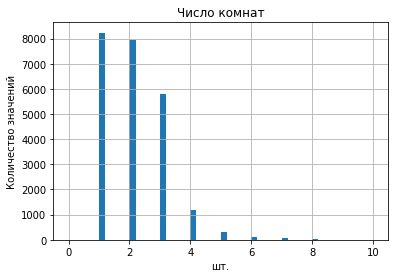

In [142]:
df.loc[df['rooms'] == 0, 'rooms'] = 1 #замена 0 на 1 в столбце 'rooms'
df.hist('rooms', range=(0, 10), bins=50) #гистограмма по столбцу 'rooms' после замены
plt.xlabel('шт.')
plt.ylabel('Количество значений')
plt.title('Число комнат')
plt.show()

Больше всего объявлений о продаже однокомнатных квартир, чуть меньше двухкомнатных и трехкомнатных. 

#### Высота потолков

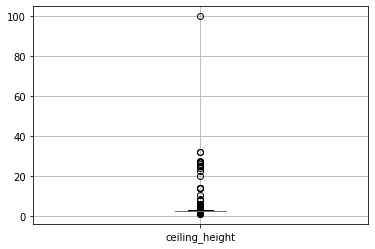

In [143]:
df.boxplot('ceiling_height') #диаграмма размаха по столбцу 'ceiling_height'
plt.show()

Из-за большого количества выбросов трудно определить основные показатели

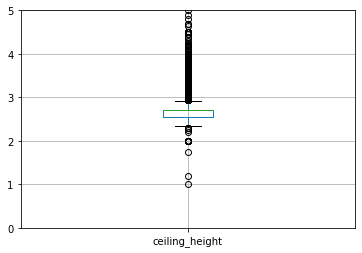

In [144]:
plt.ylim(0, 5)
df.boxplot('ceiling_height') #диаграмма размаха по столбцу 'ceiling_height'
plt.show()

В данных встречатся много выбросов - как слишком маленьких значений, так и подозрительно больших

In [145]:
df['ceiling_height'].describe() #столбца 'ceiling_height'

count    23650.000000
mean         2.733775
std          1.010372
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Медиана равна среднему значению, значит можно заменить аномально низкие значения высоты потолка на медиану не повлияет на результат анализа.

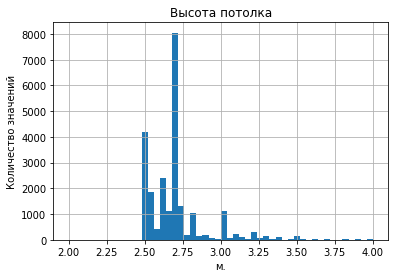

In [146]:
df.loc[df['ceiling_height'] < 2.5, 'ceiling_height'] = df['ceiling_height'].median() 
#замена аномально низких значений высоты потолка на медиану

df['ceiling_height'].hist(range=(2,4), bins=50) #гистограмма по столбцу 'ceiling_height'
plt.xlabel('м.')
plt.ylabel('Количество значений')
plt.title('Высота потолка')
plt.show()

Наибольшее количество значений в диапазоне до 3.5. На графике выделяются несколько пиков, вероятно, это стандартные значения высоты потолка.

#### Время продажи квартиры

Рассмотрим время продажи квартиры

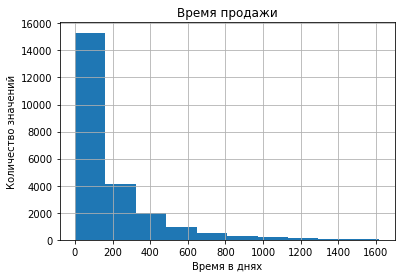

In [147]:
df['days_exposition'].hist() #гистограмма по столбцу 'days_exposition'
plt.xlabel('Время в днях')
plt.ylabel('Количество значений')
plt.title('Время продажи')
plt.show()

Значения в данных о длительности продажи врьируются от 0 до 1600 дней. Рассмотрим данные более подробно, используя диаграмму размаха

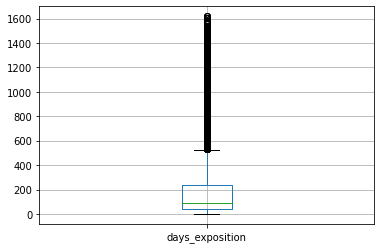

In [148]:
df.boxplot('days_exposition') #диаграмма размаха по столбцу 'days_exposition'
plt.show()

Большая часть данных в диапазоне до 500 дней, а медиана около 100. Также есть много выбросов с высокими значениями

In [149]:
df['days_exposition'].describe()

count    23650.000000
mean       185.714419
std        233.455771
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

Аномальные значения превышающие 500 дней могли появиться в результате того, что объявление могло публиковаться автоматически, и снято с публикации пользователем не сразу после продажи квартиры. Обычно продажа занимает три месяца, а большинство квартир было продано в течение 8 месяцев. Сделки, заключенные менее, чем за 40 дней - необычно быстрые и составляют четверть данных, а более, чем за 240 дней - подозрительно долгие.

Оставим в работе данные, не содержащие аномальных значений


In [150]:
good_df = df.query('total_area < 300 and rooms <= 7 and 7 < days_exposition < 600 and ceiling_height < 4 and 25000 < price_per_m2 < 200000')
good_df.shape #вывод размера новой таблицы

(20293, 29)

Размер таблицы значительно уменьшился, но увеличилось качество данных. Построим гистограммы по анализируемым столбцам после фильрации

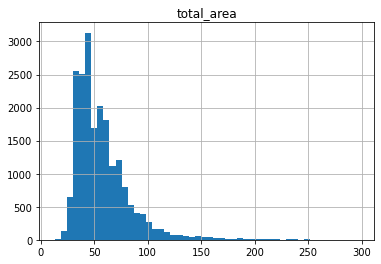

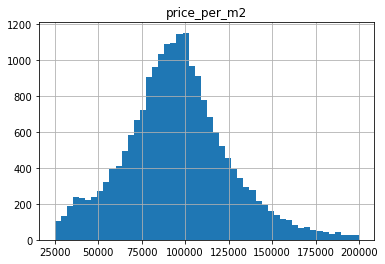

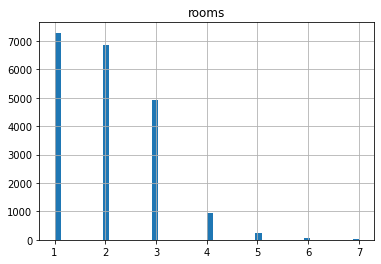

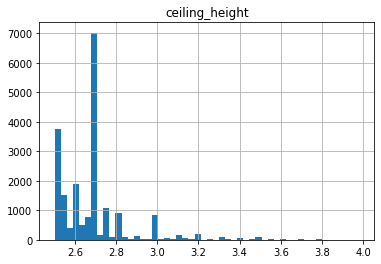

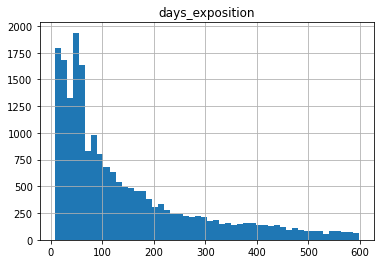

In [151]:
columns = ['total_area', 'price_per_m2', 'rooms', 'ceiling_height', 'days_exposition']
for column in columns: #цикл строит отдельную гистограмму по выбранным столбцам
    good_df.hist(column, bins=50)
    

#### Вывод

В результате полученных данных можно сделать вывод, что в среднем продажа недвижимости занимает 3-8 месяцев. Основная доля приходится на объявления о продаже 1-3-комнатных квартир с площадью 40-70 кв.м., а стоимость квадратного метра по области около 100000 руб.

### Факторы, влияющие на стоимость квартиры

Рассмотрим как влияют на стоимость квартиры площадь помещения, число комнат, этаж и удаленность от центра города

In [152]:
good_df.corr()['last_price']

total_images           0.154038
last_price             1.000000
total_area             0.836168
rooms                  0.555870
ceiling_height         0.437850
floors_total           0.079740
living_area            0.689122
floor                  0.081571
studio                -0.054152
open_plan             -0.034398
kitchen_area           0.572380
balcony                0.041865
airports_nearest      -0.002738
cityCenters_nearest   -0.274336
parks_around3000       0.158189
parks_nearest          0.036498
ponds_around3000       0.174055
ponds_nearest         -0.102608
days_exposition        0.101211
price_per_m2           0.592168
day_exposition        -0.015101
month_exposition       0.007761
year_exposition        0.018897
living_to_total       -0.080587
kitchen_to_total      -0.211579
Name: last_price, dtype: float64

In [153]:
good_df.corr()['price_per_m2']

total_images           0.144329
last_price             0.592168
total_area             0.126382
rooms                 -0.078293
ceiling_height         0.320906
floors_total           0.299016
living_area            0.031928
floor                  0.230961
studio                 0.036702
open_plan              0.015278
kitchen_area           0.299752
balcony                0.041782
airports_nearest       0.011587
cityCenters_nearest   -0.256614
parks_around3000       0.119135
parks_nearest          0.084467
ponds_around3000       0.126575
ponds_nearest         -0.072059
days_exposition       -0.011024
price_per_m2           1.000000
day_exposition        -0.014551
month_exposition      -0.005186
year_exposition        0.087129
living_to_total       -0.176176
kitchen_to_total       0.228650
Name: price_per_m2, dtype: float64

Рассмотрим зависимости подробнее с помощью графиков

#### Площадь помещения

Корреляция: 0.8361683077339046


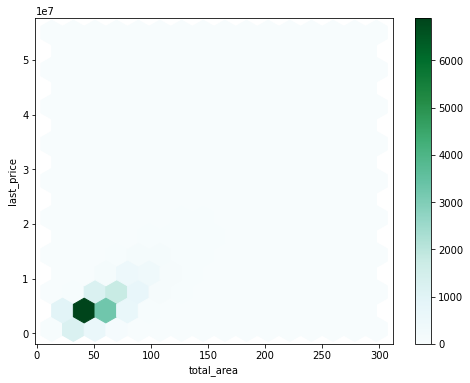

In [154]:
good_df.plot(x='total_area', y='last_price', kind='hexbin', sharex=False, gridsize=15, figsize=(8, 6))
print('Корреляция:', good_df['total_area'].corr(good_df['last_price']))

Корреляция в 0.84 говорит о высокой зависимости показателей. С ростом площади увеличивается и стоимость квартиры, однако, есть и другие факторы влияющие на цену. Чтобы провести анализ без зависимости от площади, рассмотрим влияние остальных факторов на цену за квадратный метр

#### Этаж

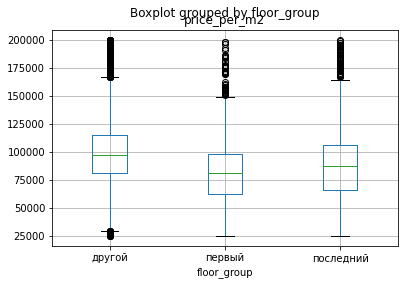

In [155]:
good_df.boxplot(column = 'price_per_m2', by = 'floor_group')
plt.show()

По медианным значениям диаграммы размаха можно сделать вывод, что больше ценятся квартиры на средних этажах, а две похожие квартиры на первом и последнем этаже будут стоить примерно одинаково.

#### Количество комнат

Корреляция: 0.5558697149221647


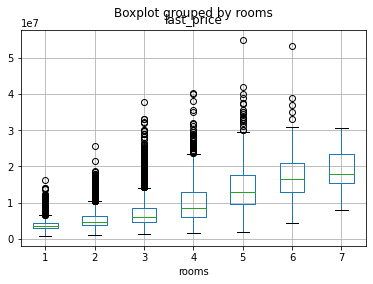

In [156]:
good_df.boxplot(column = 'last_price', by = 'rooms')
print('Корреляция:', good_df['rooms'].corr(good_df['last_price']))
plt.show()

Корреляция в 0,56 говорит о наличии связи, но не слишком сильной. Можно сделать вывод, что средняя стоимость квартиры растет в зависимости от числа комнат в квартире. Самая низкая стоимость у 1-комнатных квартир, самая высокая - у семикомнатных

#### Расстояние до центра

Корреляция: -0.25661401368805964


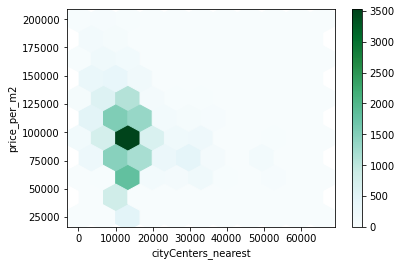

In [157]:
good_df.plot(x='cityCenters_nearest', y='price_per_m2', kind='hexbin', sharex=False, gridsize=10)
print('Корреляция:', good_df['price_per_m2'].corr(good_df['cityCenters_nearest']))

Отрицательная корреляция говорит об обратной зависимости цены от расстояния до центра. С увеличением расстояния цена уменьшается, но незначительно, т.к. это не главный фактор, влияющий на цену.

#### Дата размещения

Построим графики зависимости цены от дня недели, месяца и года с помощью функции

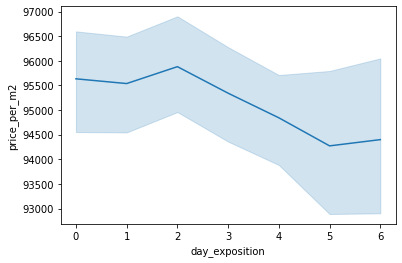

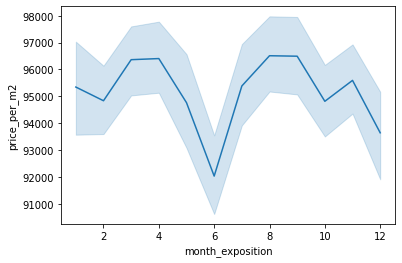

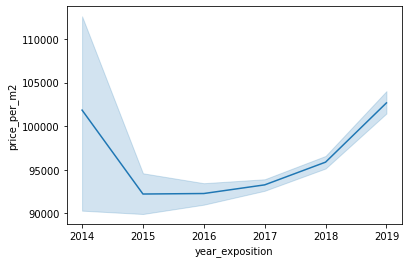

In [158]:
def date_to_price(data): #функция строит отдельный график по выбранным столбцам в заданоой таблице
    columns = ['day_exposition', 'month_exposition', 'year_exposition']
    for column in columns:
        sns.lineplot(data=data,  x=column, y='price_per_m2')
        plt.show()
        
date_to_price(good_df)

Можно сделать вывод что скачки цен на недвижимость за 2015-2019 годы приходились на март и август, а снижение наблюдалось в июне и декабре. Цены поднимаются к середине недели, а ближе к выходным идут на спад. В период с 2015 по 2017 наблюдался плавный рост и значительный разброс цен, а с 2017 - резкий рост и разброс цен близкий к среднему.

#### Вывод

На основе проведенного анализа можно сделать вывод, что стоимость жилья - это совокупность многих факторов. Например, чем больше площадь, тем больше цена квартиры. Также влияют количество комнат, расстояние до центра города и этаж. При этом одна и та же квартира, проданная в 2019 году, в 2017 стоила гораздо меньше.

### Предложения квартир по населенным пунктам

Найдем 10 населенных пунктов с наибольшим числом объявлений со средней ценой квадратного метра в каждом

In [159]:
#сводная таблица по населенным пунктам с подсчетом количества значений и среднего значения по каждому населенному пункту
top_ten_city = good_df.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'mean'])

#переименование столбцов
top_ten_city.columns = ['Количество объявлений', 'Средняя цена квадратного метра']

#переименование названия колонки индексов
top_ten_city.index = top_ten_city.index.rename('Населенный пункт')

#приведение значений столбца 'Средняя цена квадратного метра' к целочисленному виду
top_ten_city['Средняя цена квадратного метра'] = (top_ten_city['Средняя цена квадратного метра']).astype('int')

#сортировка по количеству объявлений по убыванию
top_ten_city = top_ten_city.sort_values(by='Количество объявлений', ascending=False) 

#вывод сводной таблицы
display(top_ten_city.head(10))

,Количество объявлений,Средняя цена квадратного метра
Населенный пункт,,
Санкт-Петербург,13425,107980
поселок Мурино,534,86209
деревня Кудрово,422,95467
поселок Шушары,414,78750
Всеволожск,352,67050
Пушкин,316,101308
Колпино,310,75099
поселок Парголово,300,89573
Гатчина,265,69662


Наибольшее количество объявлений о продаже недвижимости в Санкт-Петербурге, здесь же и самая высокая цена за квадратный метр. Из 10 населенных пунктов с наибольшим количеством объявлений наименьшая стоимость квадратного метра в г.Выборг

### Предложения квартир в Санкт-Петербурге

Выделим из таблицы предложения только по Санкт-Петербургу и определим границу отделяющую центр города

In [160]:
saint_data = good_df.query('locality_name == "Санкт-Петербург"') #группировка данных по Санкт-Петербургу

#новый столбец с расстоянием до центра в км
saint_data['center_km'] = (saint_data['cityCenters_nearest'] / 1000).astype('int')

#группировка по расстоянию до центра в километрах со средним значением цены за кв.м.
#приведение полученных данных к целочисленному виду
price_per_km = (saint_data.pivot_table(index='center_km', values='price_per_m2')).astype('int')

#сброс индексов
price_per_km = price_per_km.reset_index()

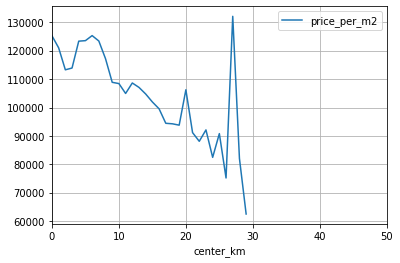

In [161]:
#график зависимости цены за кв.м. от удаленности от центра города
price_per_km.plot(x='center_km', y='price_per_m2', grid=True, xlim=(0, 50)) 
plt.show()

По графику можно сделать вывод, что граница центра города находится на расстоянии 9 км, где график сильно меняется. Выделим сегмент квартир в центре

In [162]:
saint_center = saint_data.query('center_km <= 9') #создание новой таблицы с объявлениями о продаже квартир в центре

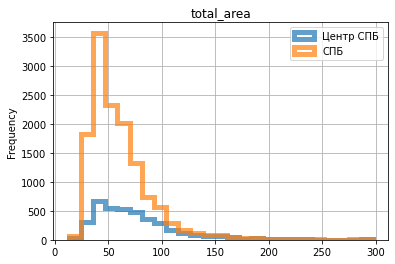

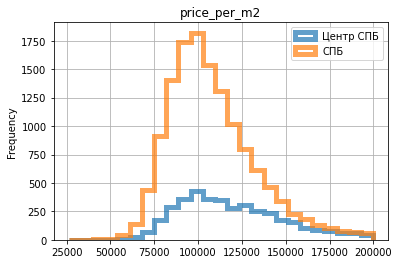

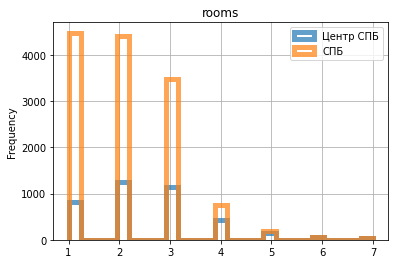

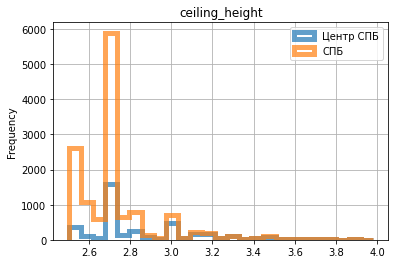

In [163]:
columns = ['total_area', 'price_per_m2', 'rooms', 'ceiling_height'] #цикл строит сравнительную гистограмму по выбранным столбцам

for column in columns:
    ax=saint_center.plot(kind='hist',
                         y=column, 
                         histtype='step',
                         bins=25,linewidth=5,
                         alpha=0.7,
                         label='Центр СПБ',
                        )
    saint_data.plot(kind='hist',
                    y=column, 
                    title=column,
                    histtype='step',
                    bins=25,
                    linewidth=5,
                    alpha=0.7,
                    label='СПБ',
                    ax=ax,
                    grid=True,
                    legend=True,
                   )


По гистограммам можно сделать вывод, что в центре преобладают квартиры с большей площадью и, если в целом по Санкт-Петербургу средняя цена за кв.м. 90-120 тыс.руб., то в центре 100-140 тыс.руб. Также в центральной части города преобладают 2-3-комнатные квартиры, когда во всем городе однокомнатные. Квартиры с высотой потолка в 3 м чаще встречаются в центре, а в среднем по городу стандартная высота 2,7 м.
Проверим влияние основных факторов на стоимость кв.м. в Санкт-Петербурге в общем и отдельно в центре города.

Для сравнения посчитаем как одни и те же факторы влияют на цену жилья в центре и в Санкт-Петербурге в целом

In [164]:
good_df.corr()['last_price']

total_images           0.154038
last_price             1.000000
total_area             0.836168
rooms                  0.555870
ceiling_height         0.437850
floors_total           0.079740
living_area            0.689122
floor                  0.081571
studio                -0.054152
open_plan             -0.034398
kitchen_area           0.572380
balcony                0.041865
airports_nearest      -0.002738
cityCenters_nearest   -0.274336
parks_around3000       0.158189
parks_nearest          0.036498
ponds_around3000       0.174055
ponds_nearest         -0.102608
days_exposition        0.101211
price_per_m2           0.592168
day_exposition        -0.015101
month_exposition       0.007761
year_exposition        0.018897
living_to_total       -0.080587
kitchen_to_total      -0.211579
Name: last_price, dtype: float64

In [165]:
saint_data.corr()['last_price']

total_images           0.135552
last_price             1.000000
total_area             0.874516
rooms                  0.594096
ceiling_height         0.403485
floors_total          -0.007264
living_area            0.719552
floor                  0.033868
studio                -0.054570
open_plan             -0.032718
kitchen_area           0.591108
balcony                0.039996
airports_nearest      -0.004757
cityCenters_nearest   -0.381082
parks_around3000       0.159648
parks_nearest          0.030091
ponds_around3000       0.190969
ponds_nearest         -0.116442
days_exposition        0.139176
price_per_m2           0.495717
day_exposition        -0.013947
month_exposition       0.004697
year_exposition        0.034151
living_to_total       -0.099281
kitchen_to_total      -0.243134
center_km             -0.380401
Name: last_price, dtype: float64

Рассмотрим зависимость показателей на графике

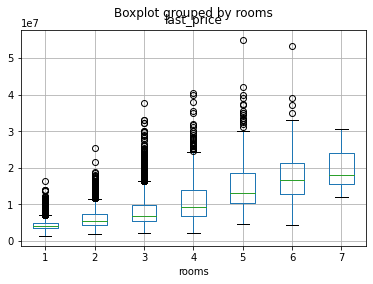

In [166]:
saint_data.boxplot(column = 'last_price', by = 'rooms') #город
plt.show()

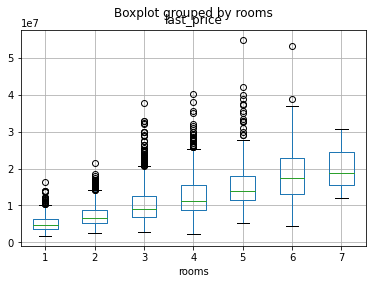

Корреляция: 0.6083381888372933


In [167]:
saint_center.boxplot(column = 'last_price', by = 'rooms') #центр города
plt.show()
print('Корреляция:', saint_center['rooms'].corr(saint_center['last_price']))

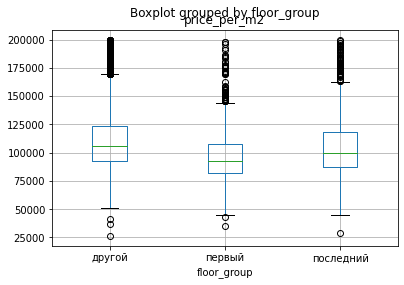

Корреляция: 0.594096255585045


In [168]:
saint_data.boxplot(column = 'price_per_m2', by = 'floor_group') #город
plt.show()
print('Корреляция:', saint_data['rooms'].corr(saint_data['last_price']))

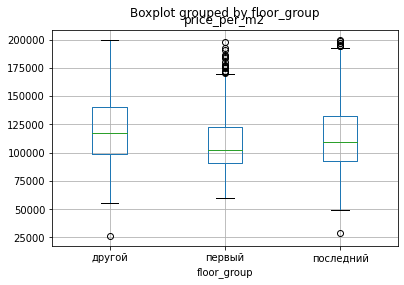

In [169]:
saint_center.boxplot(column = 'price_per_m2', by = 'floor_group') #центр СПБ
plt.show()

В центре, как и в общем в городе, пятикомнатные квартиры самые дорогие и цена уменьшается с количеством комнат

Корреляция: -0.31669907453544943


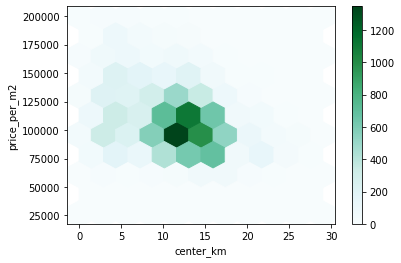

In [170]:
saint_data.plot(x='center_km', y='price_per_m2', kind='hexbin', sharex=False, gridsize=10) #город
print('Корреляция:', saint_data['price_per_m2'].corr(saint_data['center_km']))

Корреляция: -0.07212261851567105


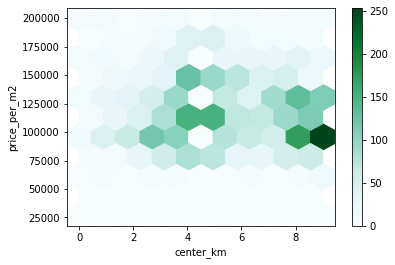

In [171]:
saint_center.plot(x='center_km', y='price_per_m2', kind='hexbin', sharex=False, gridsize=10) #центр города
print('Корреляция:', saint_center['price_per_m2'].corr(saint_center['center_km']))

Расстояние от центра влияет на стоимость квадратного метра, но незначительно. Чем ближе к центру, тем эта зависимость меньше - если квартира в центре, то уже не так важно насколько близко к нему.

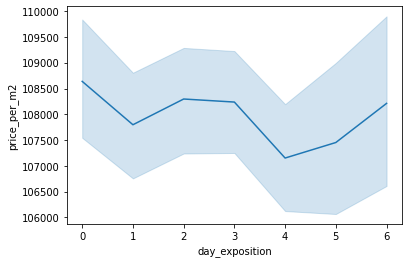

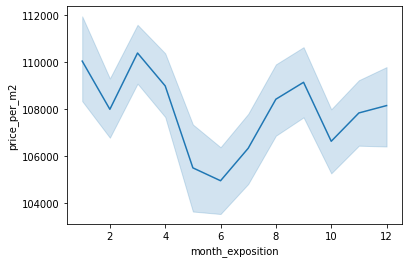

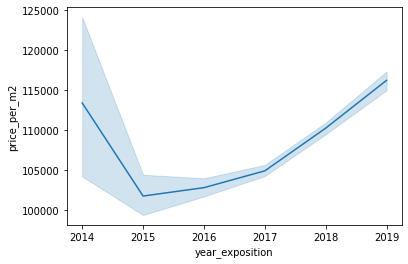

In [172]:
date_to_price(saint_data) #город

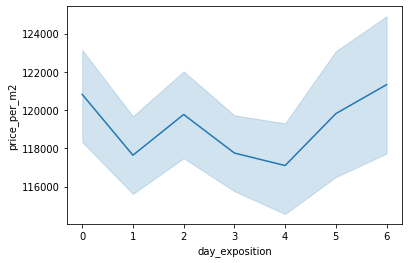

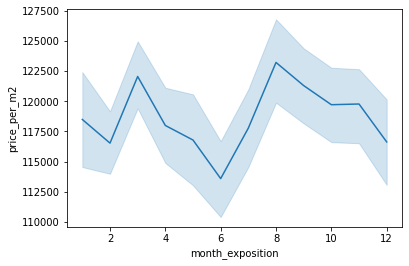

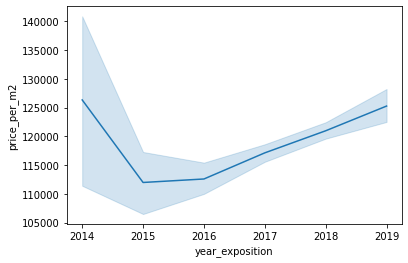

In [173]:
date_to_price(saint_center) #центр города

Тенденция к зависимости стоимости жилья от даты размещения объявления примерно одинаковая как для центра, так и для города в целом.

## Вывод
В результате проведенного анализа можно сделать вывод, что площадь квартир по Ленинградской области в среднем составляет 50 кв.м, при этом в центре преобладают квартиры с большей площадью и с большим количеством комнат, а в области, наоборот, однокомнатные квартиры с меньшей площадью. Высота потолков стандартна и немногим отличается в центре города. На стоимость в основном влияет площадь квартиры, дата размещения объявления и количество комнат. В меньшей степени может повлиять этаж и удаленность от центра города. В Санкт-Петербурге, как и в области, отмечались скачки цен в марте и в августе, но в разрезе года  отмечалось резкое повышение цен на квартиры в центре города в 2015, когда как в остальном городе в 2017. В области квартиры падают в цене к выходным, когда как в Санкт-Петербурге, наоборот, возрастают.